In [10]:
!pip install preprocessor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
#from tweepy import *
#from credentials import *
import tweepy
import csv
import re 
import string
import preprocessor as p
 
consumer_key = "ne5lmEym9VlnCjsTQgtNmzkoT"
consumer_secret = "SM4T7ya488W2QA3wmjUSo617Z2ndk0HlKVDKINj4Ypmg2CHfEU"
access_key= "1375790319627735040-EspENq1gWuAEf7ri378PrcRtGgfGjg"
access_secret = "gY4uNw18SYjGDWwHn6VqlREpI6sJ6jJtnaKiFTuud3Jsr"

In [12]:
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_key, access_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
resp= tweepy.API(auth)

In [13]:
api = tweepy.API(auth,wait_on_rate_limit=True)

In [14]:
#THE TWEET SEARCH
search_words = "#BJP"      #enter your words
new_search = search_words + " -filter:retweets"

In [15]:
csvFile = open('/content/tweete.csv', 'a')
csvWriter = csv.writer(csvFile)

In [16]:
tweets=[]
for tweet in tweepy.Cursor(api.search,q=new_search,count=150,lang="en",since_id=0).items(500):
    #csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.screen_name.encode('utf-8'), tweet.user.location.encode('utf-8')])
    tweets.append([tweet.text])

In [17]:
import pandas as pd
df = pd.DataFrame(tweets,columns=['TWEET'])
df.head()

,TWEET
0,Exclusive | TIMES NOW accesses CCTV footage of...
1,Talib's phone has shown photos &amp; videos wh...
2,UP Man Selling Chicken On Paper With Photos Of...
3,FORMER UNION MINISTER A.RAJA SPEECH IN NAMAKKA...
4,Perfect...\nJust perfect...\n#BJP https://t.co...


In [18]:
df.shape

(500, 1)

TEXT PREPROCESSING

In [19]:
!pip install spacy==2.3.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Packages for data preparation
from sklearn.model_selection import train_test_split
#from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#TO REMOVE DUPLICATE VALUES (IF ANY)
df = df.drop_duplicates()

In [22]:
#TO CHECK NULL VALUES (IF ANY)
df.isnull().sum()

TWEET    0
dtype: int64

In [23]:
#CLEAN UP TWEET EXTRAS
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags and other quotations
    txt = re.sub(r'&', '', txt)
    txt = re.sub(r'-', '', txt)  
    txt = re.sub(r'#', '', txt) 
    txt = re.sub(r"'", '', txt)
    txt = re.sub(r'"', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    # Remove b"
    txt = re.sub(r'b"', '', txt)
    txt = re.sub(r'\b\w{1,2}\b', '', txt)
    # Remove other unnecessary attributes
    txt = re.sub(r'\\x{1,6}', '', txt)
    txt = re.sub(r'\\{1,6}','',txt)
    txt = re.sub(r'e280a6', '', txt)
    txt = re.sub(r'f09f998f', '', txt)
    return txt

df['TWEET'] = df['TWEET'].apply(cleanUpTweet)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
#GET THE DATASET WITH SUBJECTIVITY AND POLARITY
from textblob import TextBlob
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

df['Subjectivity'] = df['TWEET'].apply(getTextSubjectivity)
df['Polarity'] = df['TWEET'].apply(getTextPolarity)

In [25]:
#IDENTIFY THE TWEETS SCORE WITH POLARITY
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

df['Score'] = df['Polarity'].apply(getTextAnalysis)
df

,TWEET,Subjectivity,Polarity,Score
0,Exclusive | TIMES NOW accesses CCTV footage t...,1.00,-0.875,Negative
1,Talibs phone has shown photos amp; videos whic...,0.80,-0.500,Negative
2,Man Selling Chicken Paper With Photos Hindu...,0.75,-0.125,Negative
3,FORMER UNION MINISTER .RAJA SPEECH NAMAKKAL S...,0.00,0.000,Neutral
4,Perfect...\nJust perfect...\nBJP,1.00,1.000,Positive
...,...,...,...,...
495,When will have the say and run their own affa...,1.00,0.600,Positive
496,soon going join BJP ... Cant blame him nothi...,0.00,0.000,Neutral
497,What will officers get return for helping ...,0.00,0.000,Neutral
498,BJPs terrorist connection.\nBJPWithTerrorist...,0.55,0.350,Positive


In [26]:
df['Score'].value_counts()

Neutral     278
Positive    137
Negative     84
Name: Score, dtype: int64

In [28]:
df[['TWEET','Score']].to_csv('twt_data.csv',index=False)

In [6]:
df = pd.read_csv('twt_data.csv')

In [7]:
df.sample(5)

,TWEET,Score
22,(/)\n \nAsserting that the BJP has captured al...,Neutral
289,"terrorist caught Jamp; and linked with BJP, ...",Neutral
446,"Monday, BJP politician Kapil Mishra posted T...",Neutral
453,Islam Bad Religions And Spread The World..\...,Negative
214,…,Neutral


In [5]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
def remove_stopwords(input_text):
  stopwords_list = stopwords.words('english')
  whitelist = ["n't", "not", "no"]
  words = input_text.split() 
  clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
  return " ".join(clean_words) 
    
def remove_mentions(input_text):
  return re.sub(r'@\w+', '', input_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NANDHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NANDHINI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
       
df.TWEET = df.TWEET.apply(remove_stopwords).apply(remove_mentions)
df

def percentage( data_frame , val ):
  percent = df[df['Score'] == val]
  print(percent.shape[0]/(df.shape[0])*100)

neg = percentage(df , 'Negative')
neu = percentage(df , 'Neutral')
pos = percentage(df , 'Positive')

NameError: name 'df' is not defined

<BarContainer object of 3 artists>

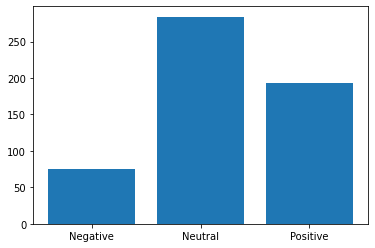

In [ ]:
labels = df.groupby('Score').count().index.values
values = df.groupby('Score').size().values
plt.bar(labels, values)

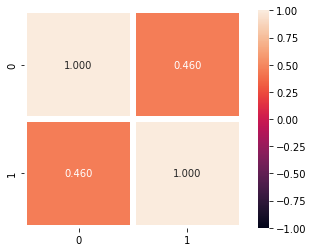

In [ ]:
import numpy as np
import seaborn as sn
#correlation
correl = np.corrcoef(df.Subjectivity,	df.Polarity)
sn.heatmap(correl, annot = True, fmt = ".3f", linewidths=5, vmin = -1, vmax = 1, square = True)
plt.show()

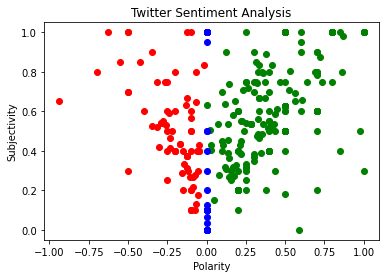

In [ ]:
for index, row in df.iterrows():
    if row['Score'] == 'Positive':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="green")
    elif row['Score'] == 'Negative':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="red")
    elif row['Score'] == 'Neutral':
        plt.scatter(row['Polarity'], row['Subjectivity'], color="blue")

plt.title('Twitter Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
# add legend
plt.show()

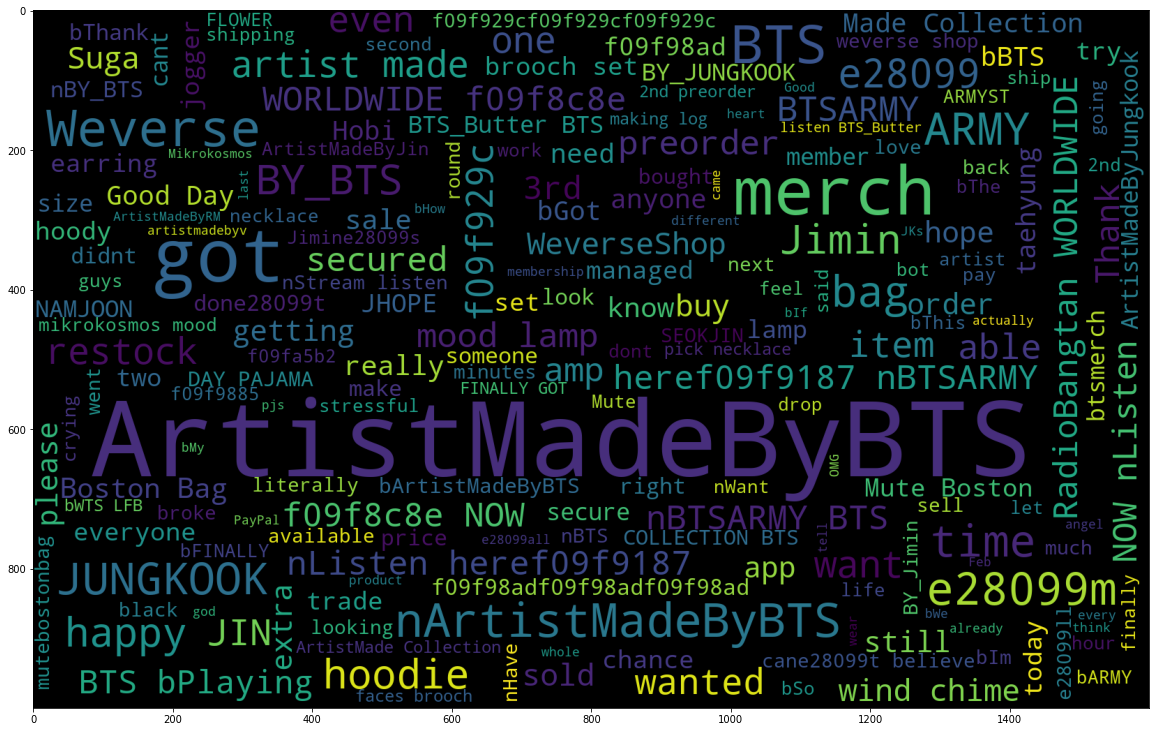

In [ ]:
words = ' '.join([tweet for tweet in df['TWEET']])
plt.figure(figsize = (20,20) )
wordCloud = WordCloud(width=1600, height=1000, max_font_size = 150).generate(words)
#max_words = 75,
plt.imshow(wordCloud)
plt.show()

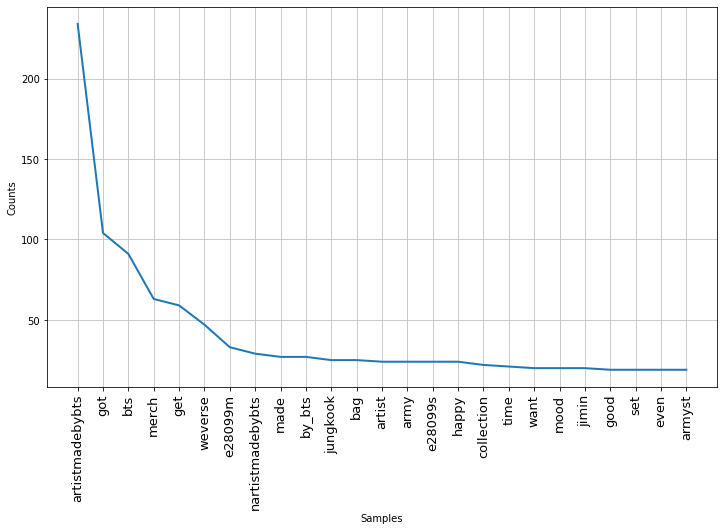

In [ ]:
from collections import Counter
import nltk
# most common words in twitter dataset
all_words = []
for line in list(df['TWEET']):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
# plot word frequency distribution of first few words
plt.figure(figsize=(12,7))
plt.xticks(fontsize=13, rotation=90)
fd = nltk.FreqDist(all_words)
fd.plot(25,cumulative=False)

In [ ]:
lens = df['TWEET'].str.len()
print(lens.mean())

83.89311594202898


In [ ]:
#import plotly.express as px
#nltk.download('punkt')
#len1 = [ len(nltk.word_tokenize(tweet)) for tweet in df['TWEET'] ]
#fig = px.histogram(x = len1, nbins = 50)
#fig.show()

MACHINE LEARNING

In [ ]:
X = df.TWEET
y = pd.get_dummies(df.Score)
#df["Score"]= df['Score'].replace('Negative', '-1')
#df['Score']= df['Score'].replace('Neutral', '0')
#df['Score']= df['Score'].replace('Positive', '1')
y = df.Score

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=10, max_features=None, strip_accents='unicode', analyzer='word', token_pattern=r'\w{1,}', ngram_range=(1, 4), use_idf=True, smooth_idf=True, sublinear_tf=True, stop_words = 'english')
tfv.fit(x_test)
X_train = tfv.transform(x_train)
X_test = tfv.transform(x_test)

LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(penalty='l2', 
                               dual=False, 
                               tol=0.0001, 
                               C=1, 
                               fit_intercept=True, 
                               intercept_scaling=1.0, 
                               class_weight=None, 
                               random_state=None)

#LogisticRegression(C=1, penalty='l1', solver='liblinear')

model.fit(X_test, y_test)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
print('Train Accuracy:', accuracy_score(y_train, predictions_train)*100)
print('Test Accuracy:', accuracy_score(y_test, predictions_test)*100)

Train Accuracy: 55.55555555555556
Test Accuracy: 58.55855855855856


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,predictions_test)
print(cm)
cf = classification_report(y_test,predictions_test)
print(cf)
#accuracy_score(y_test,predictions_test)

[[ 3 11  1]
 [ 2 53  0]
 [ 1 31  9]]
              precision    recall  f1-score   support

    Negative       0.50      0.20      0.29        15
     Neutral       0.56      0.96      0.71        55
    Positive       0.90      0.22      0.35        41

    accuracy                           0.59       111
   macro avg       0.65      0.46      0.45       111
weighted avg       0.68      0.59      0.52       111



MULTINOMIAL NB

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)
predictions_train1 = model.predict(X_train) 
predictions_test1 = model.predict(X_test)
print('Train Accuracy:', accuracy_score(y_train, predictions_train1)*100)
print('Test Accuracy:', accuracy_score(y_test, predictions_test1)*100)

Train Accuracy: 55.78231292517006
Test Accuracy: 57.65765765765766


In [ ]:
cm1 = confusion_matrix(y_test,predictions_test1)
cr1 = classification_report(y_test,predictions_test)
print(cm1)
print(cr1)

[[ 0 14  1]
 [ 0 55  0]
 [ 0 32  9]]
              precision    recall  f1-score   support

    Negative       0.50      0.20      0.29        15
     Neutral       0.56      0.96      0.71        55
    Positive       0.90      0.22      0.35        41

    accuracy                           0.59       111
   macro avg       0.65      0.46      0.45       111
weighted avg       0.68      0.59      0.52       111



TF-ID VECTORIZER

In [ ]:
vectorizer = TfidfVectorizer(min_df=2)
train_term = vectorizer.fit_transform(x_train)
test_term = vectorizer.transform(x_test)
#vectorizer.get_feature_names()[:20]

#X_train
model1 = MultinomialNB()
model1.fit(train_term, y_train)
predictions_train2 = model1.predict(train_term)
predictions_test2 = model1.predict(test_term)
print('Train Accuracy:', accuracy_score(y_train, predictions_train2)*100)
print('Test Accuracy:', accuracy_score(y_test, predictions_test2)*100)

Train Accuracy: 83.21995464852607
Test Accuracy: 66.66666666666666


In [ ]:
cm2 = confusion_matrix(y_test, predictions_test2)
cr2 = classification_report(y_test, predictions_test2)
print(cm2)
print(cr2)

[[ 0  9  6]
 [ 0 54  1]
 [ 0 21 20]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.64      0.98      0.78        55
    Positive       0.74      0.49      0.59        41

    accuracy                           0.67       111
   macro avg       0.46      0.49      0.46       111
weighted avg       0.59      0.67      0.60       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model3 = classifier.fit(X_train, y_train)
predictions_train3 = model3.predict(X_train)
predictions_test3 = model3.predict(X_test)
print('Train Accuracy:', accuracy_score(y_train, predictions_train3)*100)
print('Test Accuracy:', accuracy_score(y_test, predictions_test3)*100)

Train Accuracy: 58.27664399092971
Test Accuracy: 55.85585585585585


In [ ]:
cm3 = confusion_matrix(y_test, predictions_test3)
cr3 = classification_report(y_test, predictions_test3)
print(cm3)
print(cr3)

[[ 0  5 10]
 [ 1 35 19]
 [ 0 14 27]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.65      0.64      0.64        55
    Positive       0.48      0.66      0.56        41

    accuracy                           0.56       111
   macro avg       0.38      0.43      0.40       111
weighted avg       0.50      0.56      0.52       111



SVC

In [ ]:
from sklearn.svm import SVC
svc_ml = SVC(kernel = 'linear', random_state = 0)
model4 = svc_ml.fit(X_train, y_train)
predictions_train4 = model4.predict(X_train)
predictions_test4 = model4.predict(X_test)
print('Train Accuracy:', accuracy_score(y_train, predictions_train4)*100)
print('Test Accuracy:', accuracy_score(y_test, predictions_test4)*100)

Train Accuracy: 55.78231292517006
Test Accuracy: 57.65765765765766


In [ ]:
cm4 = confusion_matrix(y_test, predictions_test4)
cr4 = classification_report(y_test, predictions_test4)
print(cm4)
print(cr4)

[[ 0 14  1]
 [ 0 55  0]
 [ 0 32  9]]
              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        15
     Neutral       0.54      1.00      0.71        55
    Positive       0.90      0.22      0.35        41

    accuracy                           0.58       111
   macro avg       0.48      0.41      0.35       111
weighted avg       0.60      0.58      0.48       111



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
